In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import chardet
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [ ]:
# 파일의 인코딩 확인
with open('clusterdata.csv', 'rb') as file:
    rawdata = file.read()
    result = chardet.detect(rawdata)
    print(result['encoding'])  # 인코딩 형식 출력
    
# EUC-KR 인코딩으로 CSV 파일 읽기
df = pd.read_csv('clusterdata.csv', encoding='EUC-KR')

# UTF-8-SIG 인코딩으로 새 CSV 파일로 저장
df.to_csv('clusterdata_1.csv', encoding='utf-8-sig', index=False)

with open('clusterdata_1.csv', 'rb') as file:
    rawdata = file.read()
    result = chardet.detect(rawdata)
    print(result['encoding'])  # 인코딩 형식 출력

## 로그 변환

In [5]:
# data.csv 파일 읽기
df = pd.read_csv('clusterdata_1.csv')

# 'Cluster' 컬럼을 제외하고, 필요한 컬럼에 대해 로그 변환을 적용
df['자산총계'] = np.log(df['자산총계'])
df['매출액'] = np.log(df['매출액'])
df['직원수'] = np.log(df['직원수'])

# 변환된 데이터를 원본 df에 재저장
df.to_csv('clusterdata_1.csv', index=False)

print("로그 변환된 데이터를 'clusterdata_1.csv' 파일로 저장했습니다.")

로그 변환된 데이터를 'clusterdata_1.csv' 파일로 저장했습니다.


In [6]:
df = pd.read_csv('clusterdata_1.csv', encoding='utf-8', index_col=0)
df.head()

,자산총계,매출액,직원수
회사명,,,
(주)그라운드엑스,11.505236,10.440010,4.234107
(주)글라인,8.885164,4.736198,2.397895
(주)글앤그림미디어,10.013283,10.826198,2.564949
(주)넥스트레벨스튜디오,7.816014,8.072467,3.912023
(주)님블뉴런,9.000730,9.475470,4.941642


In [7]:
df.shape

(106, 3)

In [8]:
df.isnull().sum()

자산총계    0
매출액     0
직원수     0
dtype: int64

## Min_Max 스케일링

In [9]:
from sklearn.preprocessing import MinMaxScaler

# clusterdata_1.csv 파일 읽기
df = pd.read_csv('clusterdata_1.csv')

# Min-Max 스케일러 초기화
scaler = MinMaxScaler()

# 스케일링할 특성 선택 (예: 유동자산, 비유동자산, 자본총계, 영업비용, 종업원수)
features = ['자산총계', '매출액', '직원수']

# 해당 특성들에 대해 Min-Max 스케일링 적용
df[features] = scaler.fit_transform(df[features])

# 결과를 다시 clusterdata_2.csv 파일로 저장
df.to_csv('clusterdata_2.csv', index=False)

print("Min-Max 스케일링이 완료된 데이터를 'clusterdata_2' 파일로 저장했습니다.")

Min-Max 스케일링이 완료된 데이터를 'clusterdata_2' 파일로 저장했습니다.


In [10]:
df = pd.read_csv('clusterdata_2.csv', encoding='utf-8', index_col=0)
df.head()

,자산총계,매출액,직원수
회사명,,,
(주)그라운드엑스,0.596375,0.688581,0.603518
(주)글라인,0.278992,0.205930,0.341789
(주)글앤그림미디어,0.415647,0.721260,0.365601
(주)넥스트레벨스튜디오,0.149480,0.488242,0.557609
(주)님블뉴런,0.292991,0.606963,0.704368


In [11]:
df.shape

(106, 3)

In [12]:
df.isnull().sum()

자산총계    0
매출액     0
직원수     0
dtype: int64

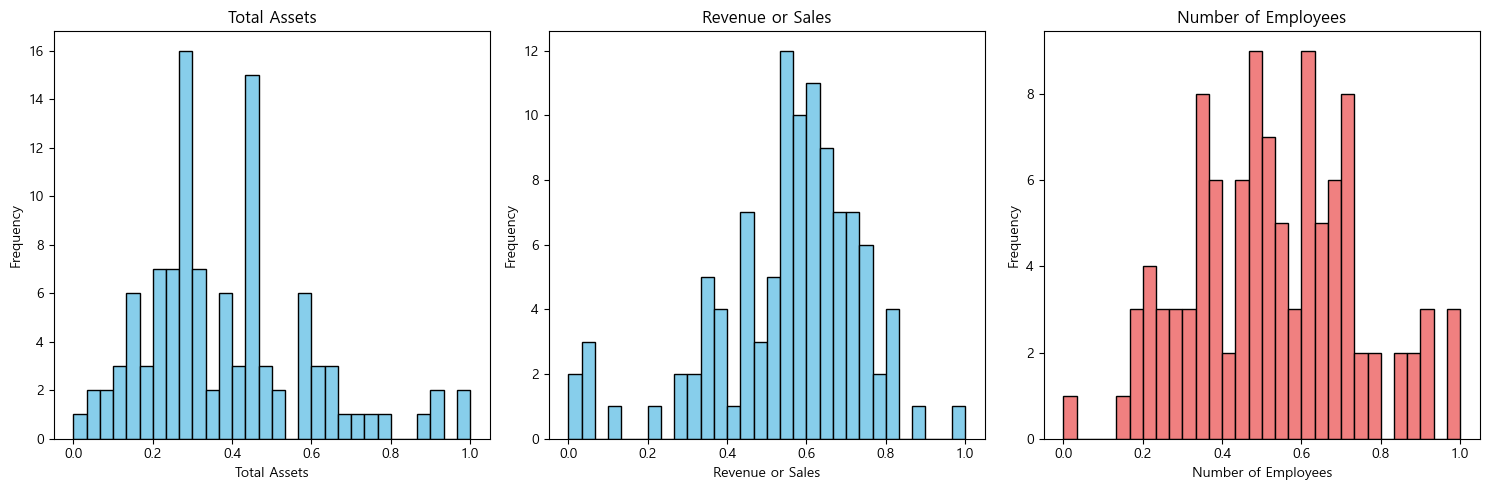

In [13]:
# 서브플롯 생성: 1행 3열로 나눔
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=False)

# '자산총계' 히스토그램
axes[0].hist(df['자산총계'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Total Assets')
axes[0].set_xlabel('Total Assets')
axes[0].set_ylabel('Frequency')

# '매출액' 히스토그램
axes[1].hist(df['매출액'], bins=30, color='skyblue', edgecolor='black')
axes[1].set_title('Revenue or Sales')
axes[1].set_xlabel('Revenue or Sales')
axes[1].set_ylabel('Frequency')

# '직원수' 히스토그램
axes[2].hist(df['직원수'], bins=30, color='lightcoral', edgecolor='black')
axes[2].set_title('Number of Employees')
axes[2].set_xlabel('Number of Employees')
axes[2].set_ylabel('Frequency')

# 레이아웃 정리
plt.tight_layout()
plt.show()

In [14]:
print(df)

                   자산총계       매출액       직원수
회사명                                        
(주)그라운드엑스      0.596375  0.688581  0.603518
(주)글라인         0.278992  0.205930  0.341789
(주)글앤그림미디어     0.415647  0.721260  0.365601
(주)넥스트레벨스튜디오   0.149480  0.488242  0.557609
(주)님블뉴런        0.292991  0.606963  0.704368
...                 ...       ...       ...
(주)카카오벤처스      0.685501  0.625397  0.469779
(주)카카오페이손해보험   0.642759  0.563384  0.717953
(주)카카오페이증권     0.878336  0.759758  0.834157
(주)케이큐브홀딩스     0.995079  0.695116  0.197599
케이피보험서비스(주)    0.082615  0.448676  0.474963

[106 rows x 3 columns]


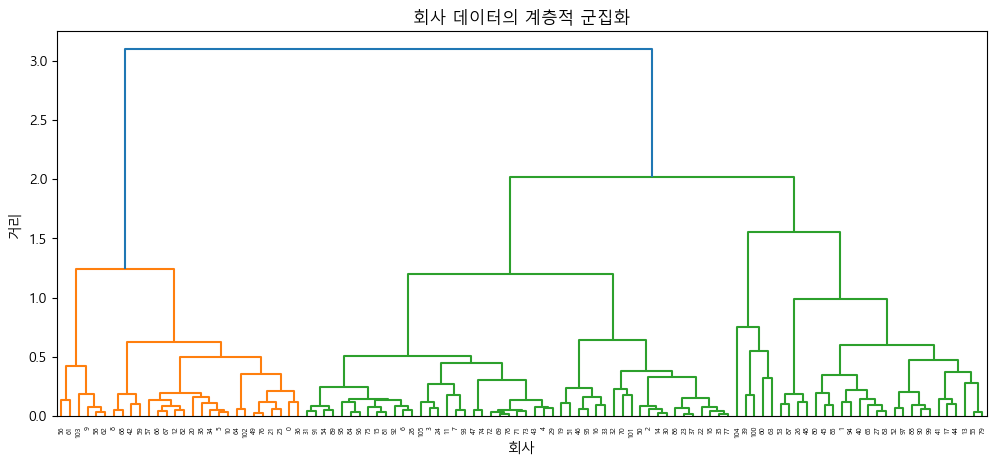

In [15]:
from scipy.cluster.hierarchy import fcluster

# 계층적 군집화 수행 (유클리드 거리와 워드 연결법 사용)
Z = linkage(df, method='ward', metric='euclidean')

clusters = fcluster(Z, t=3, criterion='maxclust')
df['Cluster'] = clusters

plt.figure(figsize=(12, 5))
dendrogram(Z)
plt.title('회사 데이터의 계층적 군집화')
plt.xlabel('회사')
plt.ylabel('거리')
plt.show()

In [16]:
print(df)
# 결과를 다시 clusterdata_3.csv 파일로 저장
df.to_csv('clusterdata_3.csv', index=True, encoding='utf-8')

                   자산총계       매출액       직원수  Cluster
회사명                                                 
(주)그라운드엑스      0.596375  0.688581  0.603518        1
(주)글라인         0.278992  0.205930  0.341789        3
(주)글앤그림미디어     0.415647  0.721260  0.365601        2
(주)넥스트레벨스튜디오   0.149480  0.488242  0.557609        2
(주)님블뉴런        0.292991  0.606963  0.704368        2
...                 ...       ...       ...      ...
(주)카카오벤처스      0.685501  0.625397  0.469779        2
(주)카카오페이손해보험   0.642759  0.563384  0.717953        1
(주)카카오페이증권     0.878336  0.759758  0.834157        1
(주)케이큐브홀딩스     0.995079  0.695116  0.197599        3
케이피보험서비스(주)    0.082615  0.448676  0.474963        2

[106 rows x 4 columns]


In [17]:
# 각 클러스터에 포함된 인덱스를 그룹화하여 확인
# pd.set_option('display.max_rows', None)  # 출력되는 행 수 제한 없애기
pd.set_option('display.max_colwidth', None)  # 열 너비 제한 없애기

clustered_data = df.groupby('Cluster').apply(lambda x: x.index.tolist())

# 결과 확인
pd.DataFrame(clustered_data)

C:\Users\권정일\AppData\Local\Temp\ipykernel_19420\3714548503.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  clustered_data = df.groupby('Cluster').apply(lambda x: x.index.tolist())


,0
Cluster,
1,"[ (주)그라운드엑스 , (주)다온크리에이티브 , (주)디케이테크인 , (주)라이온하트스튜디오 , (주)레디엔터테인먼트 , (주)메타보라 , (주)삼양씨앤씨 , (주)세나테크놀로지 , (주)스타쉽엔터테인먼트 , (주)아이에스티엔터테인먼트 , (주)야나두 , (주)에스엠브랜드마케팅 , (주)엑스엘게임즈 , (주)와이어트 , (주)카카오모빌리티 , (주)카카오브레인 , (주)카카오브이엑스 , (주)카카오스타일 , (주)카카오엔터테인먼트 , (주)카카오엔터프라이즈 , (주)카카오헬스케어 , (주)케이더블유북스 , (주)케이드라이브 , (주)케이앤웍스 , (주)케이엠파크 , (주)키즈노트 , (주)카카오페이손해보험 , (주)카카오페이증권 ]"
2,"[ (주)글앤그림미디어 , (주)넥스트레벨스튜디오 , (주)님블뉴런 , (주)돌고래유괴단 , (주)드림위더스 , (주)링키지랩 , (주)바람픽쳐스 , (주)보이스루 , (주)브이에이에스티 , (주)비에이치엔터테인먼트 , (주)사나이픽처스 , (주)쇼노트 , (주)숲엔터테인먼트 , (주)슈퍼코믹스스튜디오 , (주)스튜디오좋 , (주)스튜디오클론 , (주)스튜디오플로우 , (주)쓰리와이코프레이션 , (주)씨엠엔피 , (주)아이앤아이소프트 , (주)안테나 , (주)어썸이엔티 , (주)엔글 , (주)영화사월광 , (주)오션드라이브스튜디오 , (주)이담엔터테인먼트 , (주)이케이게임즈 , (주)제이와이드컴퍼니 , (주)케이엠세븐 , (주)케이엠솔루션 , (주)케이엠식스 , (주)케이엠쓰리 , (주)케이엠원 , (주)케이엠투 , (주)케이엠파이브 , (주)케이엠파킹앤스페이스 , (주)케이엠포 , (주)키위바인 , (주)파괴연구소 , (주)플레이하드 , (주)필연매니지먼트 , (주)하이업엔터테인먼트 , 글링크미디어(주) , 동고택시(주) , 메가몬스터(주) , 오오티비(주) , 트리플라(주) , (주)카카오벤처스 , 케이피보험서비스(주) ]"
3,"[ (주)글라인 , (주)모아엘앤비인터내셔널 , (주)비글 , (주)스튜디오리얼라이브 , (주)스튜디오원픽 , (주)에스엠스튜디오스 , (주)에스엠유니버스 , (주)에스엠타운플래너 , (주)엔크로키 , (주)영화사 집 , (주)온마인드 , (주)인타임 , (주)전국화물마당 , (주)진화 , (주)카카오스페이스 , (주)카카오인베스트먼트 , (주)컬러버스 , (주)코드독 , (주)크리에이션뮤직라이츠 , (주)티제이파트너스 , (주)파이디지털헬스케어 , (주)피트니스캔디 , (주)픽셀허브 , (주)하늘을담다 , 로고스필름(주) , 크로스픽쳐스(주) , 프리티비지(주) , (주)에스엠컬처파트너스 , (주)케이큐브홀딩스 ]"


In [18]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# 실루엣 점수 계산 (군집 내 응집도와 군집 간 분리도)
silhouette = silhouette_score(df[['자산총계', '매출액', '직원수']], df['Cluster'])
print(f"실루엣 점수: {silhouette}")

# 데이비스 볼딘 점수 계산 (군집 간 분산과 군집 내 분산의 비율)
db_index = davies_bouldin_score(df[['자산총계', '매출액', '직원수']], df['Cluster'])
print(f"데이비스 볼딘 점수: {db_index}")

실루엣 점수: 0.30483612149861944
데이비스 볼딘 점수: 1.1685639051300534


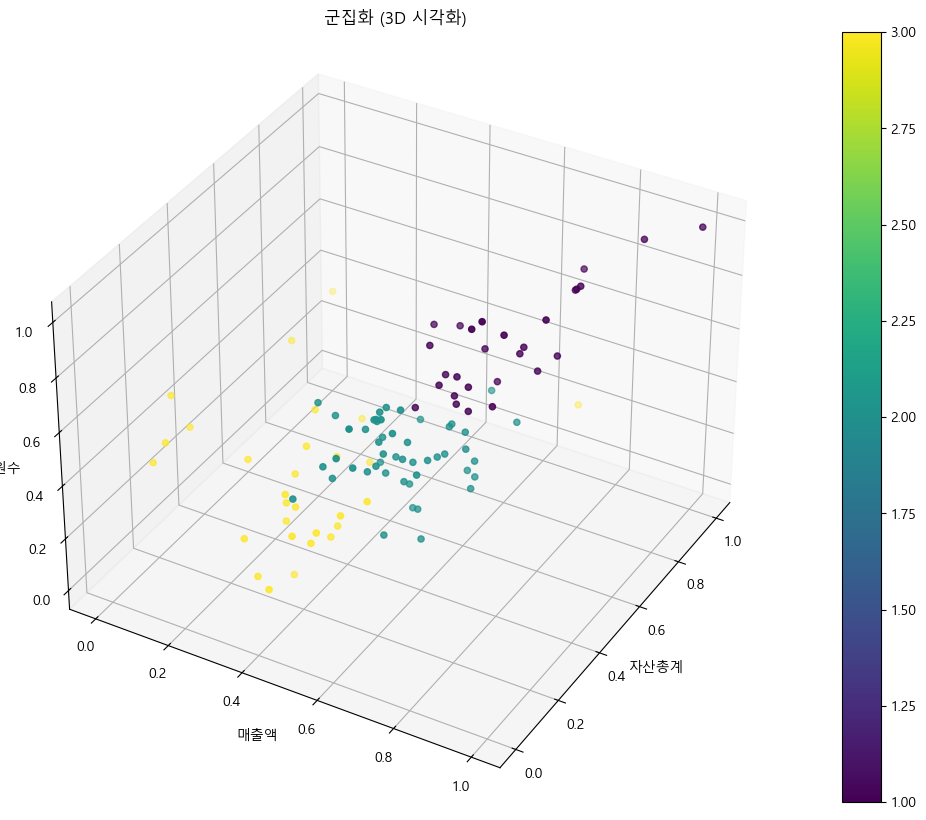

In [19]:
from mpl_toolkits.mplot3d import Axes3D

# 3D 시각화
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111, projection='3d')

# 3D 산점도 그리기
scatter = ax.scatter(df['자산총계'], df['매출액'], df['직원수'], c=df['Cluster'], cmap='viridis')

# 특정 축 반전 (예: x축만 반전)
ax.invert_xaxis()  # x축 반전

# 축 라벨 추가
ax.set_xlabel('자산총계')
ax.set_ylabel('매출액')
ax.set_zlabel('직원수')

# 타이틀 추가
ax.set_title('군집화 (3D 시각화)')

# 색상 바 추가
plt.colorbar(scatter)

# 각도 설정 (elev = 고도, azim = 회전 각도)
ax.view_init(elev=35, azim=30)

# 그래프 출력
plt.show()
